In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data_sample.csv', index_col='date')
data = data.iloc[:, [4]]

In [2]:
data

,close
date,
2024-01-26 08:35:00,2211.44
2024-01-26 08:36:00,2210.08
2024-01-26 08:37:00,2209.59
2024-01-26 08:38:00,2210.01
2024-01-26 08:39:00,2210.52
...,...
2024-01-29 09:58:00,2272.03
2024-01-29 09:59:00,2273.23
2024-01-29 10:00:00,2271.99


In [3]:
from talib import RSI

data['rsi'] = RSI(data['close'])
data.dropna(axis=0, inplace=True)

In [4]:
data

,close,rsi
date,,
2024-01-26 08:49:00,2207.43,30.089374
2024-01-26 08:50:00,2209.03,40.303959
2024-01-26 08:51:00,2209.27,41.680433
2024-01-26 08:52:00,2208.23,37.631163
2024-01-26 08:53:00,2208.10,37.145378
...,...,...
2024-01-29 09:58:00,2272.03,63.214638
2024-01-29 09:59:00,2273.23,66.968045
2024-01-29 10:00:00,2271.99,60.139397


In [5]:
data['shift'] = data['rsi'].shift(-1)
data.dropna(axis=0, inplace=True)

In [6]:
data

,close,rsi,shift
date,,,
2024-01-26 08:49:00,2207.43,30.089374,40.303959
2024-01-26 08:50:00,2209.03,40.303959,41.680433
2024-01-26 08:51:00,2209.27,41.680433,37.631163
2024-01-26 08:52:00,2208.23,37.631163,37.145378
2024-01-26 08:53:00,2208.10,37.145378,41.289187
...,...,...,...
2024-01-29 09:57:00,2271.71,62.149649,63.214638
2024-01-29 09:58:00,2272.03,63.214638,66.968045
2024-01-29 09:59:00,2273.23,66.968045,60.139397


In [7]:
data['time_dummy'] = np.arange(1,len(data.index)+1)
data.set_index('time_dummy', inplace=True)

In [8]:
data

,close,rsi,shift
time_dummy,,,
1,2207.43,30.089374,40.303959
2,2209.03,40.303959,41.680433
3,2209.27,41.680433,37.631163
4,2208.23,37.631163,37.145378
5,2208.10,37.145378,41.289187
...,...,...,...
4389,2271.71,62.149649,63.214638
4390,2272.03,63.214638,66.968045
4391,2273.23,66.968045,60.139397


In [9]:
X_train = data.iloc[:4000, [0,1]]
y_train = data.iloc[:4000, 2]

In [10]:
X_test = data.iloc[4000:, [0,1]]
y_test = data.iloc[4000:, 2]

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Reshape X_train to create sequences with 3999 time steps and 1 feature per time step
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))

# Check the shape of the reshaped data
print("X_train_reshaped shape:", X_train_reshaped.shape)

# Similarly, reshape X_test if needed
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

X_train_reshaped shape: (4000, 2, 1)


In [13]:
# Reshape X_train to create sequences with 3999 time steps and 1 feature per time step
X_train_reshaped = X_train.to_numpy().reshape((X_train.shape[0], X_train.shape[1], 1))

# Check the shape of the reshaped data
print("X_train_reshaped shape:", X_train_reshaped.shape)

# Similarly, reshape X_test if needed
X_test_reshaped = X_test.to_numpy().reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_reshaped shape: (4000, 2, 1)


In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential([
    LSTM(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

2024-03-19 08:00:09.395941: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 08:00:09.477105: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 08:00:09.477187: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 08:00:09.480320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 08:00:09.494820: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 08:00:11.852987: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [15]:
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32)

Epoch 1/100
125/125 [==============================] - 3s 4ms/step - loss: 2255.8069
Epoch 2/100
125/125 [==============================] - 1s 5ms/step - loss: 1276.3743
Epoch 3/100
125/125 [==============================] - 1s 4ms/step - loss: 828.9801
Epoch 4/100
125/125 [==============================] - 1s 6ms/step - loss: 545.2906
Epoch 5/100
125/125 [==============================] - 1s 5ms/step - loss: 379.1321
Epoch 6/100
125/125 [==============================] - 1s 5ms/step - loss: 270.0590
Epoch 7/100
125/125 [==============================] - 1s 6ms/step - loss: 194.1791
Epoch 8/100
125/125 [==============================] - 0s 4ms/step - loss: 143.7419
Epoch 9/100
125/125 [==============================] - 1s 4ms/step - loss: 109.7219
Epoch 10/100
125/125 [==============================] - 1s 4ms/step - loss: 86.5564
Epoch 11/100
125/125 [==============================] - 0s 4ms/step - loss: 70.5009
Epoch 12/100
125/125 [==============================] - 0s 4ms/step - loss

In [16]:
pred = model.predict(X_test_reshaped)

13/13 [==============================] - 1s 3ms/step


In [17]:
pred_df = pd.DataFrame(pred)

In [18]:
test_df = pd.DataFrame(y_test)
test_df

,shift
time_dummy,
4001,68.427926
4002,59.936649
4003,49.505921
4004,54.123375
4005,49.927132
...,...
4389,63.214638
4390,66.968045
4391,60.139397


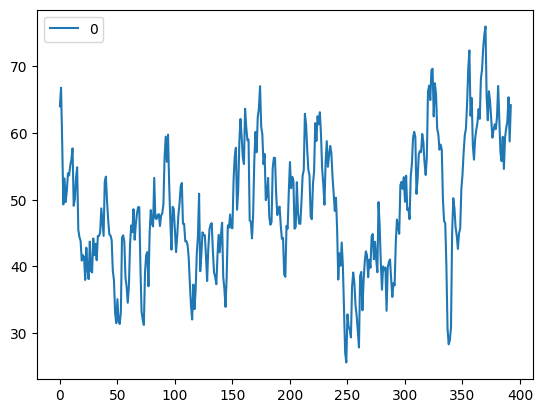

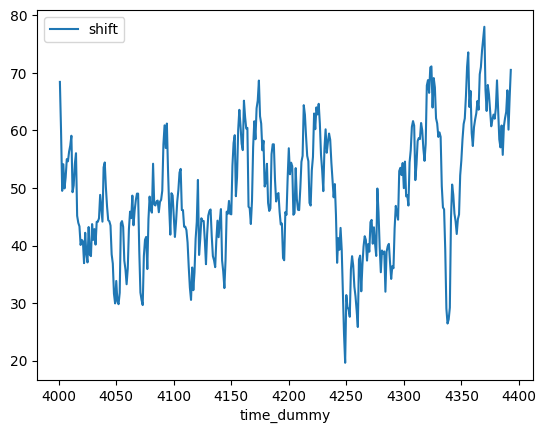

In [19]:
import matplotlib.pyplot as plt

pred_df.plot()
test_df.plot()
plt.show()

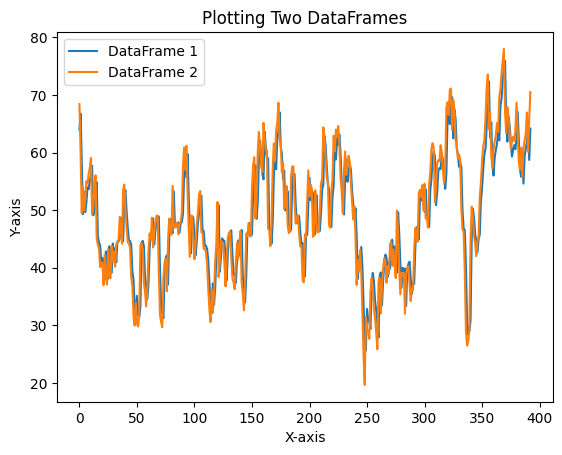

In [20]:
# Plot the data from df1
plt.plot(np.arange(len(pred_df)), pred_df[0], label='DataFrame 1')

# Plot the data from df2 on the same graph
plt.plot(np.arange(len(test_df)), test_df['shift'], label='DataFrame 2')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting Two DataFrames')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

# Assuming y_true and y_pred are arrays of continuous values
mse = mean_squared_error(y_test, pred)

In [22]:
mse

19.705361586970824

In [23]:
data_new = pd.read_csv('data_sample_one_year.csv')
data_new = data_new.iloc[:, [4]]
data_new.rename(columns={'low':'close'}, inplace=True)

data_new['rsi'] = RSI(data_new['close'])
data_new.dropna(axis=0, inplace=True)

#data_new['time_dummy'] = np.arange(1,len(data_new.index)+1)
data_new['time_dummy'] = np.arange(len(data_new.index))
data_new.set_index('time_dummy', inplace=True)

data_new

,close,rsi
time_dummy,,
0,1671.58,32.096220
1,1653.69,22.267731
2,1646.62,19.700297
3,1647.71,21.208618
4,1642.06,19.195849
...,...,...
8078,2438.64,79.375495
8079,2429.71,73.149791
8080,2424.75,69.871719


In [24]:
X_new = scaler.transform(data_new)

# Reshape X_train to create sequences with 3999 time steps and 1 feature per time step
X_new_reshaped = X_new.reshape((X_new.shape[0], X_new.shape[1], 1))

In [25]:
# Reshape X_train to create sequences with 3999 time steps and 1 feature per time step
X_new_reshaped = data_new.to_numpy().reshape((data_new.shape[0], data_new.shape[1], 1))

In [26]:
X_new

array([[-5.25009835,  0.24681651],
       [-5.42604249,  0.11307984],
       [-5.49557435,  0.07814465],
       ...,
       [ 2.15715972,  0.76082935],
       [ 2.15194729,  0.75595164],
       [ 2.24704957,  0.79393994]])

In [27]:
pred_new = model.predict(X_new_reshaped)

253/253 [==============================] - 1s 3ms/step


In [28]:
pred_new

array([[33.46771 ],
       [26.047775],
       [25.624302],
       ...,
       [68.263916],
       [67.88699 ],
       [70.96704 ]], dtype=float32)

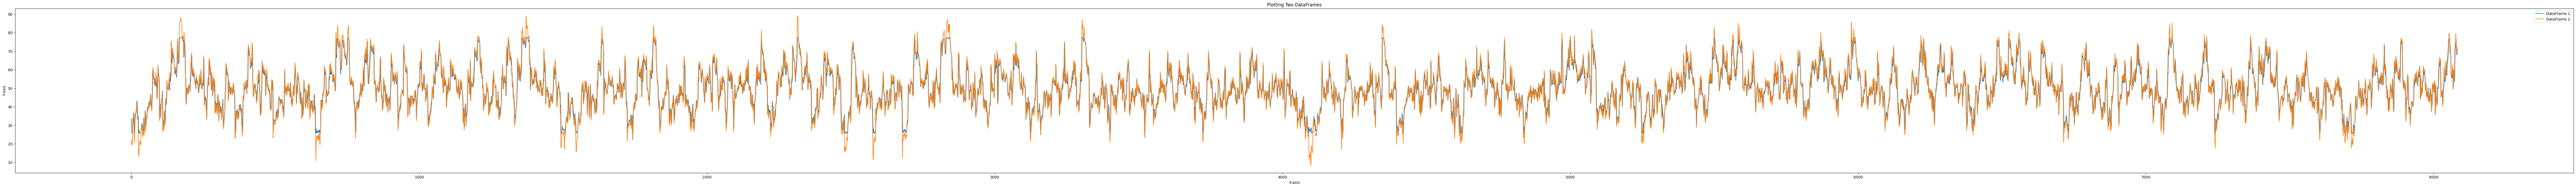

In [29]:
plt.rcParams['figure.figsize'] = (124, 8)

# Plot the data from df1
plt.plot(np.arange(len(pred_new)), pred_new, label='DataFrame 1')

# Plot the data from df2 on the same graph
plt.plot(np.arange(len(data_new)-1), data_new['rsi'].iloc[1:], label='DataFrame 2')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting Two DataFrames')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [30]:
res = pd.concat([data_new, pd.DataFrame(pred_new)], axis=1)

In [31]:
res.to_csv('res_one_year.csv')